# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, updated and split into neurons and perceptrons.
2018-0323| CEF, minor updated and spell checked.

## The Perceptron

Ok, thanks to biology for giving us a model of a neuron to work with. The neuron, or perceptron, is in ML given by a modified version of the linear regressor. Let us visit the mathematical model for the artificial neuron using _Rosenblatt's perceptron_ or _linear threshold unit (LTU)_. 

First, we have the usual $d$-dimension input feature vector, $\mathbf{x}$, and some model weights, $\mathbf{w}$, that multiplied together gave us the linear regression model output, this time dubbed $z$

$$
    \newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\mbox{\scriptsize #1}}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \newcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \newcommand\dfrac[2]{\frac{\mbox{d}~#1}{\mbox{d}#2}}    
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
\ar{rl}{
    z\powni &= \bw^\top \ac{c}{1\\\bx\powni} \\
            &= w_0 + w_1 x_1\powni + w_2 x_2\powni + \cdots + w_d x_d\powni
}
$$

remembering to add the bias weight, $w_0$, either explicitly, as $z = w_0 + \bw^\top\bx $ or by redefining our $\bx$ to have an extra 1 prepended (as usually done in linear regression)

$$
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
\ar{rl}{
  \ac{c}{1\\\bx\powni} &\mapsto \bx\powni, ~~~~\mbox{by convention in the following...}\\
}
$$

So, to ease notation, we just write  

$$
    z\powni = \bw^\top \bx\powni 
$$

in the following assuming that $\bx$ also contains a bias element, with value 1.

To make a neuron, we just extend the linear regression with a _non-linear activation_ function, $a(\cdot)$, that takes $z$ as input

$$
    y_{neuron}\powni(\bx\powni;\bw) = a(z) = a(\bw^\top\bx\powni)
$$

<br>
<img src="Figs/perceptron.png" style="width:250px">

That's it, a model nearly similar to the linear regression, but now with the added non-linear activation function. Lets put an artificial neuron, a perceptron, into action...

NOTE: [HOML] uses the term _perceptron_ to be a single __layer__ network of neurons, not just a single Rosenblatt's perceptron.

### Qa Using a Perceptron on the Moon-data

Load the moon data, split it into a train-and-test set, and train a `sklearn.linear_model.Perceptron` with default parameters (and with no cross-val this time).

What is the default score metric for the perceptron and what score do reach on the test data? 

In [3]:
import sys,os
sys.path.append(os.path.abspath('')+'/..')

from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split

from libitmal import dataloaders_v3 as itmaldataloaders

X, y = itmaldataloaders.MOON_GetDataSet(n_samples=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Perceptron(tol=1e-3, random_state=42)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7933333333333333


### Qb: Plot the Decision Boundary

Use the helper code below to plot the decision boundary for the perceptron on the moon-data.

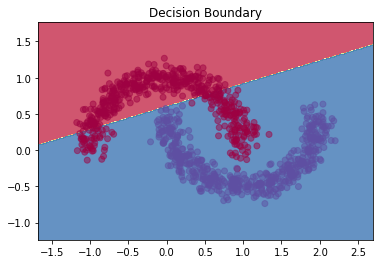

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict(x))
plt.title("Decision Boundary")
plt.show()

### Qc The Perceptron on an XOR-problem

How does the moon data relate to the well-known _XOR_-problem in machine learning?

Is it possible for a single neuron or perceptron to solve the moon/XOR problem satisfactorily?

Elaborate on the reason why not, and give a comment on how to overcome the XOR-problematic using more perceptrons. 

In [ ]:
# TODO: Qc..in text

### Qd Compare the Perceptron to the SGD

The Perceptron is said to be similar to the Stochastic Gradient Descent classifier.

Try out the SGD, with a parameter setup compatible with the perceptron, see the _notes_  section

> _`Perceptron` is a classification algorithm which shares the same underlying implementation with `SGDClassifier`. In fact, `Perceptron()` is equivalent to_ <br><br>
`SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None)` <br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

On the same train-test data train an SGD with perceptron compatible parameters. Give both models a `random_seed=42` and `tol=1e-3` parameters. 

Are the SGD and Perceptron score metrics also compatible?

Does the SGD yield the same score as the Perceptron? 

(100% similar scores, nearly similar or not at all similar?)

In [5]:
model = SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None, tol=1e-3, random_state=42)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7933333333333333
